In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D
from keras.callbacks import Callback
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [ ]:
df = pd.read_csv('Book1.csv', sep=";")
df.head()

,Tahun,GDP
0,2015,2515.6
1,2016,2648.9
2,2017,2858.5
3,2018,3063.8
4,2019,3246.7


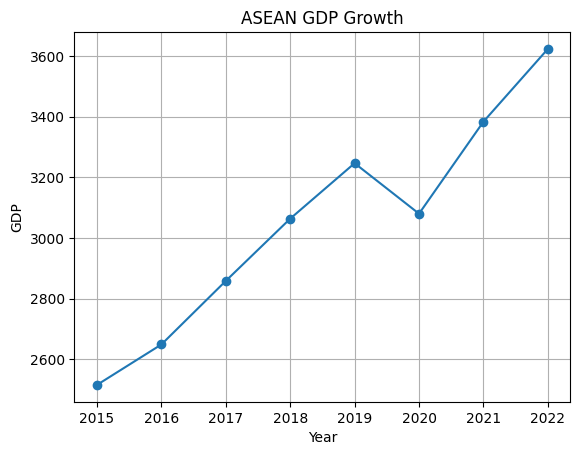

In [ ]:
# Memvisualisasikan data
plt.plot(df['Tahun'], df['GDP'], marker='o')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('ASEAN GDP Growth')
plt.grid(True)
plt.show()

In [ ]:
import random
# Setting the seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
# Mengubah data ke dalam bentuk yang dapat digunakan oleh LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['GDP'].values.reshape(-1, 1))

# Menentukan time step (jumlah tahun sebelumnya yang digunakan untuk memprediksi tahun berikutnya)
time_step = 5

In [ ]:
# Create dataset with consistent time_step
def create_dataset(data, time_step):
    X, y = [], []
    # Check if the length of data is sufficient before proceeding
    if len(data) <= time_step:
        # Handle the case where data is too short, possibly by raising an error or returning the original data
        raise ValueError("Data length must be greater than time_step")
        # Alternatively, you could return the original data:
        # return np.array(data), np.array(data)
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_step)

# The rest of the code remains the same

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
# Periksa bentuk data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2, 5)
X_test shape: (1, 5)
y_train shape: (2,)
y_test shape: (1,)


In [ ]:
# Setting the seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

class PrintMAE(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}, MAE: {logs['mae']:.4f}")

# Fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, callbacks=[PrintMAE()])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - loss: 1.0450 - mae: 1.0222Epoch 1, MAE: 0.9010
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8993 - mae: 0.9414
Epoch 2/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9522 - mae: 0.9758Epoch 2, MAE: 0.8585
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8180 - mae: 0.8976 
Epoch 3/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.8657 - mae: 0.9304Epoch 3, MAE: 0.8164
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7415 - mae: 0.8544
Epoch 4/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7803 - mae: 0.8833Epoch 4, MAE: 0.7722
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6658 - mae: 0.8092 
Epoch 5/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6930 - mae: 0.8325Epoch 5, MAE: 0.7241
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5884 - mae: 0.7602 
Epoch 6/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6019 - mae: 0.7758Epoch 6, MAE: 0.6703
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5076 - mae: 0.7055
Epoch 7/20
1/2 ━━━━━━━━

In [ ]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.4f}")

Test MAE: 0.0938


In [ ]:
# Predict the next 3 years
predictions = []
last_data = X[-1]  # Mengambil data terakhir dari dataset pelatihan

for _ in range(3):  # Memprediksi 3 tahun ke depan
    next_pred = model.predict(last_data.reshape(1, time_step, 1))
    predictions.append(next_pred[0, 0])
    last_data = np.append(last_data[1:], next_pred)  # Menambahkan prediksi ke dalam data

# Membalikkan skala prediksi ke bentuk aslinya
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Menampilkan hasil prediksi
print(f'Prediksi untuk 3 tahun ke depan: {predictions.flatten()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediksi untuk 3 tahun ke depan: [3489.956  3619.8037 3722.8462]


In [ ]:
# Create a DataFrame for the future predictions
future_years = np.arange(df['Tahun'].max() + 1, df['Tahun'].max() + 4)
df_future = pd.DataFrame({'Tahun': future_years, 'GDP': predictions.flatten()})

# Combine the historical data with the future predictions
df_combined = pd.concat([df, df_future], ignore_index=True)
df_combined

,Tahun,GDP
0,2015,2515.600000
1,2016,2648.900000
2,2017,2858.500000
3,2018,3063.800000
4,2019,3246.700000
5,2020,3080.200000
6,2021,3383.700000
7,2022,3623.600000
8,2023,3489.956055
9,2024,3619.803711


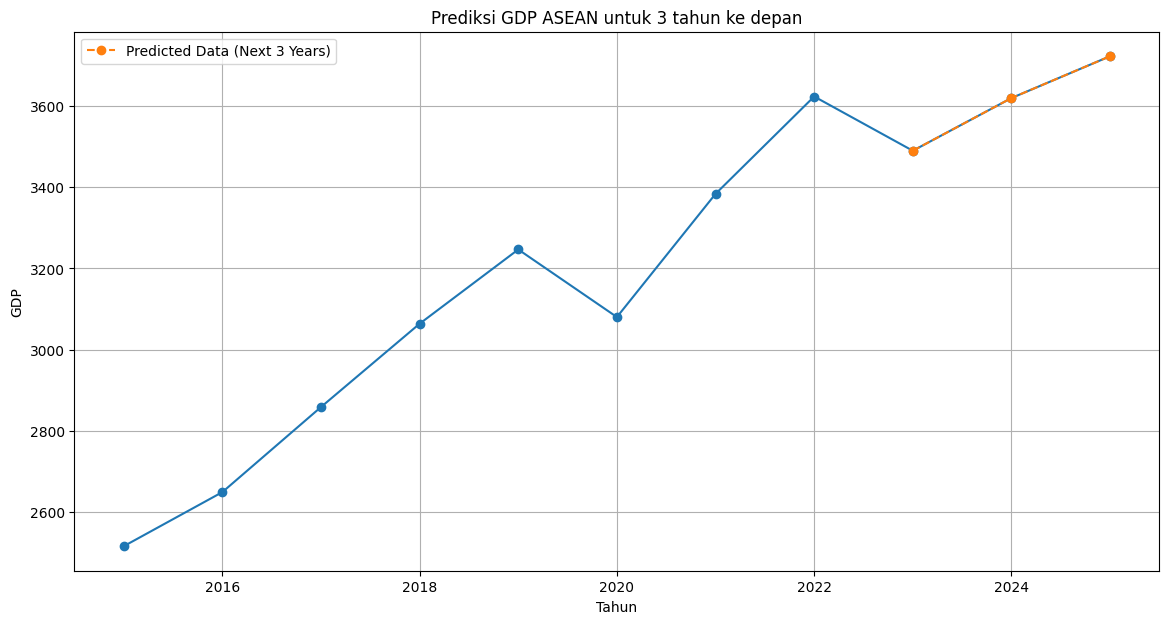

In [ ]:
# Plot data historis dan prediksi
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Tahun'], df_combined['GDP'], marker='o')
plt.plot(df_future['Tahun'], df_future['GDP'], marker='o', linestyle='--', label='Predicted Data (Next 3 Years)')
plt.xlabel('Tahun')
plt.ylabel('GDP')
plt.title('Prediksi GDP ASEAN untuk 3 tahun ke depan')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Check the shape of X
print(X.shape)

# If the shape is not fully defined, reshape X to have a defined shape
# For example, if X has 3 samples of 5 timesteps with 1 feature, reshape it to (3, 5, 1)
X = X.reshape((3, 5, 1))

# Now you can call the predict method
train_predict = model.predict(X)

(3, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung Mean Squared Error (MSE) pada data pelatihan
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
y_true = scaler.inverse_transform(y.reshape(-1, 1))

mse = mean_squared_error(y_true, train_predict)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_true, train_predict)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true, train_predict)
print(f'R-squared: {r2}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Squared Error: 10342.0106153059
Mean Absolute Error: 95.4078450520833
R-squared: 0.7908112112162881
